## Uivariate lstm example

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator

In [6]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [7]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [12]:
y

array([40, 50, 60, 70, 80, 90])

In [9]:


# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 995us/step
[[102.68489]]


In [13]:
input_shape=(n_steps, n_features)

## Univariate stacked lstm example

In [15]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [16]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [17]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [20]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 0s/step
[[104.28114]]


## Multivariate LSTM

### Multiple Input Series


In [21]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


In [53]:
df = pd.read_csv('../seir/cov_datasets/all.csv')
df['Date'] = pd.to_datetime(df['Date'])
print(df.shape)
print(df.dtypes)
df.head()

(555, 4)
Date                     datetime64[ns]
Cummulative_Deaths              float64
Infected                        float64
Cummulative_Recovered           float64
dtype: object


,Date,Cummulative_Deaths,Infected,Cummulative_Recovered
0,2020-02-14,1.0,5.0,12.0
1,2020-02-15,1.0,4.0,12.0
2,2020-02-16,1.0,1.0,13.0
3,2020-02-17,1.0,6.0,12.0
4,2020-02-18,1.0,8.0,14.0


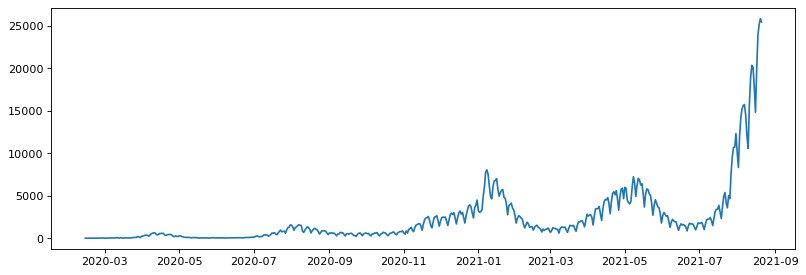

In [54]:
from matplotlib.pyplot import figure
figure(figsize=(12, 4), dpi=80)
plt.plot(df['Date'],df['Infected'])

In [55]:
training_set = df.iloc[:500, 2:3].values.astype(int)
test_set = df.iloc[500:, 2:3].values.astype(int)

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(test_set)


# Creating a data structure with 5 time-steps and 1 output
X_train = []
y_train = []

X_test = []
y_test = []
steps = 5 #days

In [7]:
print(training_set_scaled.shape)
print(testing_set_scaled.shape)

(500, 1)
(55, 1)


In [8]:
for i in range(steps, len(training_set)):
    X_train.append(training_set_scaled[i-steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(495, 5)
(495, 5, 1)


In [9]:
for i in range(steps, len(test_set)):
    X_test.append(testing_set_scaled[i-steps:i, 0])
    y_test.append(testing_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(50, 5)
(50, 5, 1)


In [38]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 15))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0747
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0384
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0178
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 5/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 8/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 9/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 10/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 11/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 12/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 13/50
16/16 [==============================

In [39]:
X_test.shape

(50, 5, 1)

In [40]:
y_pred = model.predict(X_test)
y_pred = sc.inverse_transform(y_pred) #revert scaling

In [41]:
y_pred

array([[ 1982.6589,  1932.3436,  1947.2279,  1947.3965,  1944.0735,
         1949.5338,  1967.2155,  1940.156 ,  1965.3226,  1932.9948,
         1941.7407,  1909.8256,  1895.2406,  1920.2778,  1918.2319],
       [ 2217.6833,  2165.568 ,  2189.602 ,  2183.6584,  2181.5862,
         2179.6523,  2209.379 ,  2183.8044,  2208.9968,  2168.032 ,
         2178.7793,  2149.1372,  2135.959 ,  2158.1387,  2155.5493],
       [ 2339.335 ,  2286.5977,  2315.8313,  2307.0244,  2307.4065,
         2299.674 ,  2335.7458,  2311.838 ,  2336.3286,  2292.8716,
         2302.392 ,  2274.8997,  2263.965 ,  2283.0835,  2280.5054],
       [ 2281.6611,  2229.6167,  2257.5845,  2250.4583,  2252.5073,
         2244.4314,  2277.48  ,  2254.5146,  2278.1196,  2239.0554,
         2245.346 ,  2218.4453,  2208.933 ,  2226.7654,  2224.7283],
       [ 2214.2388,  2163.131 ,  2189.3035,  2184.2122,  2188.6743,
         2179.7534,  2209.692 ,  2187.6028,  2210.1946,  2176.391 ,
         2178.6768,  2152.6467,  2145.011 , 

In [46]:
y_pred[49]

array([18099.613, 18323.395, 18632.623, 18426.527, 18213.604, 17854.248,
       18423.959, 18451.637, 18337.92 , 17980.34 , 18288.69 , 18117.262,
       18410.281, 18156.195, 18203.678], dtype=float32)

In [44]:
range(500,500+len(y_pred))

range(500, 550)

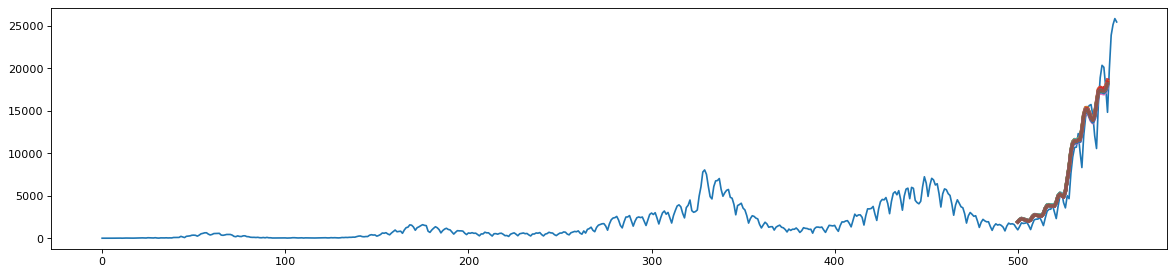

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(18, 4), dpi=80)
plt.plot(range(len(df['Infected'])), df['Infected'])
plt.plot(range(500,500+len(y_pred)), y_pred, linewidth=3.0)
plt.show()